# Aprendizaje No Supervisado

El aprendizaje no supervisado es una rama del aprendizaje automático donde el modelo busca patrones o estructuras en los datos sin necesidad de etiquetas previas. Algunas características clave incluyen:

- No hay etiquetas en los datos de entrenamiento. Esto significa que no se proporciona ninguna información sobre la variable objetivo a predecir.
- El modelo busca patrones o estructuras intrínsecas en los datos. En lugar de buscar relaciones entre características y una variable objetivo, el modelo busca relaciones y estructuras entre las características mismas.
- Se utiliza para tareas como clustering, reducción de dimensionalidad, etc. El aprendizaje no supervisado se aplica en una variedad de problemas, como segmentación de clientes, análisis de imágenes y detección de anomalías, entre otros.


## Tipos de aprendizaje no supervisado

Existen varios tipos de aprendizaje no supervisado, entre ellos se destacan:

1. **Clustering**: Agrupación de datos similares en grupos o clusters. En el clustering, el objetivo es dividir un conjunto de datos en grupos homogéneos, donde los puntos de datos dentro de un grupo son más similares entre sí que con los puntos de datos en otros grupos. Ejemplo: En un conjunto de datos de compras en línea, se puede utilizar clustering para agrupar clientes con hábitos de compra similares para campañas de marketing dirigidas.
2. **Reducción de dimensionalidad**: Reducción del número de características en los datos mientras se mantiene la información relevante. La reducción de dimensionalidad es útil cuando se trabaja con conjuntos de datos de alta dimensionalidad y se busca simplificar el modelo o mejorar la eficiencia computacional. Ejemplo: PCA (Principal Component Analysis) es una técnica comúnmente utilizada para reducir la dimensionalidad de los datos mientras se mantiene la mayor cantidad posible de la información original.


## Ejemplos de aplicaciones en la vida real

Algunos ejemplos de aplicaciones de aprendizaje no supervisado en la vida real son:

- Segmentación de clientes para marketing. En esta aplicación, se utilizan técnicas de clustering para identificar grupos de clientes con características similares, lo que permite dirigir estrategias de marketing específicas a cada segmento.
- Agrupación de documentos para la recuperación de información. En el procesamiento de lenguaje natural, se pueden utilizar algoritmos de clustering para organizar grandes colecciones de documentos en grupos temáticos, facilitando la búsqueda y la navegación.
- Compresión de imágenes. La reducción de dimensionalidad se puede aplicar en la compresión de imágenes para reducir el tamaño del archivo mientras se mantiene una calidad aceptable. Por ejemplo, los algoritmos de PCA pueden utilizarse para extraer las características más importantes de una imagen y reducir su tamaño sin perder información significativa.

## Algoritmos comunes en aprendizaje no supervisado

Algunos de los algoritmos más comunes en aprendizaje no supervisado incluyen:

1. **K-Means**: Algoritmo de clustering que asigna cada punto de datos al cluster más cercano según la distancia euclidiana. El algoritmo itera para encontrar los centroides de los clusters que minimizan la suma de las distancias al cuadrado de los puntos dentro de cada cluster. Ejemplo: Supongamos que tenemos un conjunto de datos de ventas minoristas y queremos identificar patrones de compra. Podríamos usar K-Means para agrupar productos en categorías basadas en patrones de compra similares.
2. **DBSCAN**: Algoritmo de clustering basado en densidad que encuentra regiones de alta densidad separadas por regiones de baja densidad. DBSCAN no requiere que el usuario especifique el número de clusters de antemano y es capaz de detectar clusters de formas arbitrarias. Ejemplo: Supongamos que tenemos un conjunto de datos de ubicaciones de dispositivos móviles y queremos identificar áreas urbanas densamente pobladas. Podríamos usar DBSCAN para agrupar ubicaciones de dispositivos cercanos en áreas urbanas.
3. **PCA (Principal Component Analysis)**: Algoritmo de reducción de dimensionalidad que proyecta los datos en un nuevo espacio de características con menos dimensiones mientras se conserva la mayor cantidad posible de la varianza original. PCA identifica las direcciones de máxima varianza en los datos y los usa como nuevas características. Ejemplo: Supongamos que tenemos un conjunto de datos de características de imágenes y queremos reducir la dimensionalidad para entrenar un modelo de clasificación. Podríamos usar PCA para extraer las características más importantes de las imágenes y reducir la cantidad de datos necesarios para entrenar el modelo.

## Ejemplo sencillo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


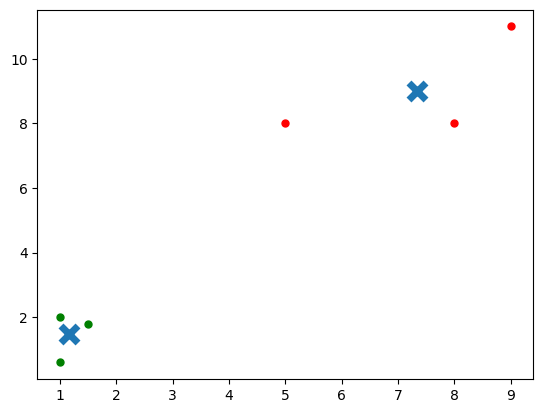

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Creamos datos de ejemplo
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])

# Definimos el número de clusters (k)
k = 2

# Creamos y ajustamos el modelo K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Obtenemos los centroides y las etiquetas de los clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Mostramos los resultados
colors = ["g.", "r."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()


## Ejemplo con el conjunto de datos flor iris

In [2]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
# Cargar el conjunto de datos Iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

### Preprocesamiento de datos

Preprocesamiento de datos:
- Eliminamos la columna 'target'.
- Escalamos las características usando StandardScaler para centrarlas y escalarlas.

In [4]:
# Preprocesamiento de datos
X = data.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means clustering

Aplicaremos el algoritmo K-Means para realizar clustering en los datos escalados.

In [5]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
data['kmeans_cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualización de los clusters

Visualizaremos los clusters obtenidos con K-Means en un gráfico de dispersión.

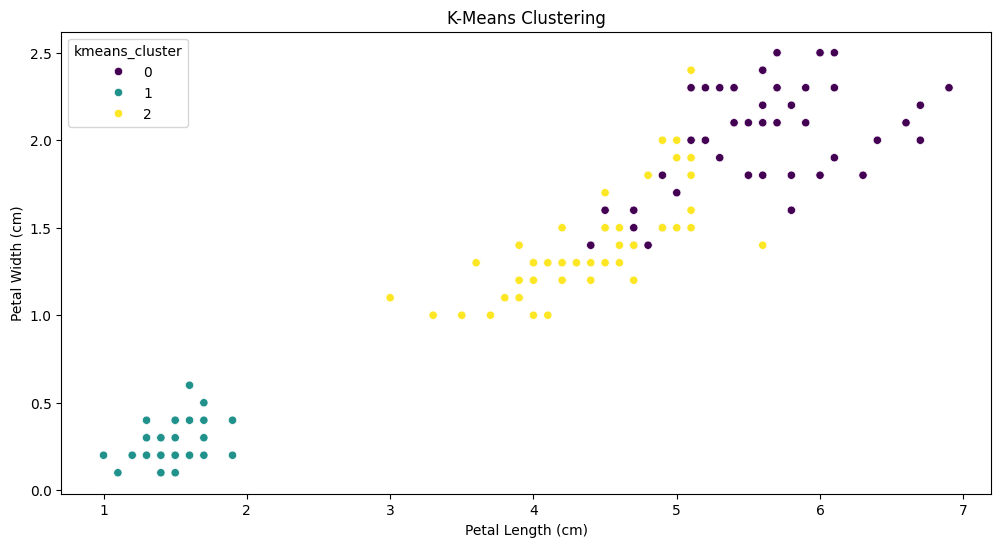

In [12]:
# Visualización de los clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue='kmeans_cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

### DBSCAN clustering

Aplicaremos el algoritmo DBSCAN para realizar clustering en los datos escalados.

In [7]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
data['dbscan_cluster'] = dbscan.labels_

### Visualización de los clusters

Visualizaremos los clusters obtenidos con DBSCAN en un gráfico de dispersión.

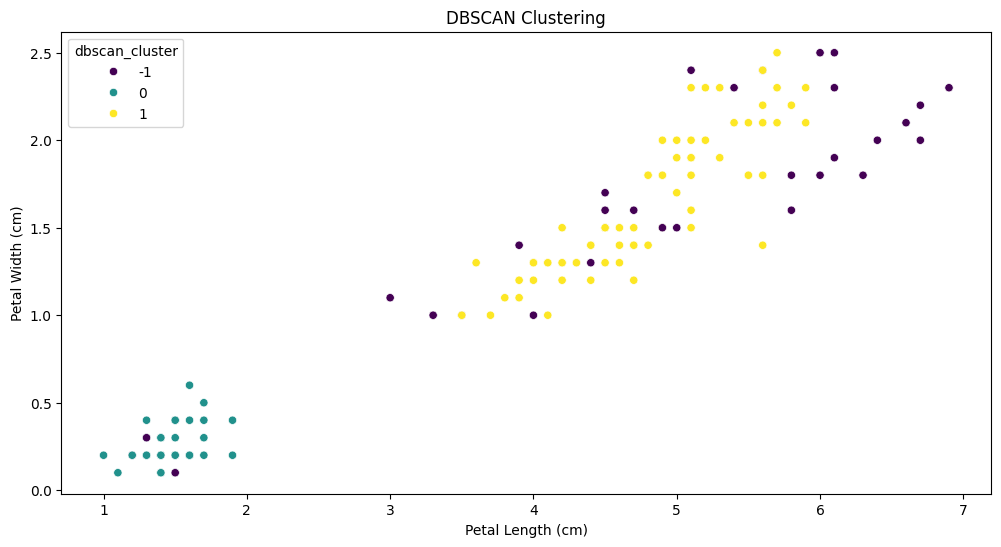

In [8]:
# Visualización de los clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue='dbscan_cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

### PCA para reducción de dimensionalidad

Aplicaremos PCA para reducir la dimensionalidad de los datos escalados y visualizaremos los componentes principales.

In [9]:
# PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['pca_1'] = X_pca[:, 0]
data['pca_2'] = X_pca[:, 1]

### Visualización de los componentes principales

Visualizaremos los componentes principales obtenidos con PCA en un gráfico de dispersión.

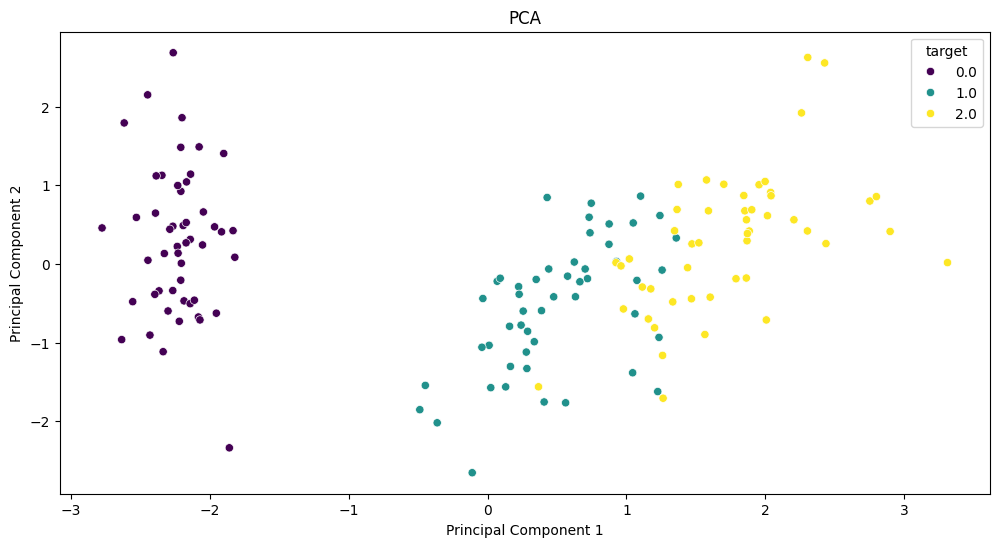

In [10]:
# Visualización de los componentes principales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='pca_1', y='pca_2', hue='target', palette='viridis', legend='full')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()